<h1 style="margin:12px 0px 0px;font-size: 20px;">Estudios de Informática, Multimedia y Telecomunicaciones</h1>

In this exercise we are going to follow the steps of the life cycle of a data mining project, in the case of a classification algorithm and more specifically a decision tree.

### Goals:

* Study the data, for example: Number of records in the file? Distributions of values by variables? Are there misreported or empty fields?
* Prepare the data. You have to choose which are the variables that will be used to build the model and which is the variable that classifies.
* Install, if necessary, the C5.0 package This is a more modern implementation of Quinlan's ID3 algorithm. It has the theoretical principles of ID3 plus automatic pruning. With this package generate a mining model.
* What is the quality of the model?
* Generate the graphical tree.
* Generate and extract model rules.
* Depending on the model, the tree and the rules: What is the knowledge we obtain?
* Test the generated model by presenting it with new records. Does it classify well enough?


### Dataset German Credit

#### 1: No debt
#### 2: With debt

It is worse to class a customer as good when they are bad (5), than it is to class a customer as bad when they are good (1). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()

### Analisis inicial de los datos

In [2]:
#Descargo el dataset
data = pd.read_csv("credit.csv")

#Cantidad de filas y columnas
print('El dataset contiene', data.shape[0], ' filas y', data.shape[1],' columnas')

#Columas
print('\nLas columnas del data set son:\n ',data.columns)

#Tipos de variables
print('\nTipo de variable de cada columna:\n',data.dtypes)

#Imprimo las primeras 5 filas del dataset
data.head()

El dataset contiene 1000  filas y 21  columnas

Las columnas del data set son:
  Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_length', 'installment_rate',
       'personal_status', 'other_debtors', 'residence_history', 'property',
       'age', 'installment_plan', 'housing', 'existing_credits', 'default',
       'dependents', 'telephone', 'foreign_worker', 'job'],
      dtype='object')

Tipo de variable de cada columna:
 checking_balance        object
months_loan_duration     int64
credit_history          object
purpose                 object
amount                   int64
savings_balance         object
employment_length       object
installment_rate         int64
personal_status         object
other_debtors           object
residence_history        int64
property                object
age                      int64
installment_plan        object
housing                 object
existing_credits         in

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [3]:
#Analizo si hay valores faltantes

print('\nCantidad de valores faltantes por columna:\n',data.isna().sum())


Cantidad de valores faltantes por columna:
 checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_length       0
installment_rate        0
personal_status         0
other_debtors           0
residence_history       0
property                0
age                     0
installment_plan        0
housing                 0
existing_credits        0
default                 0
dependents              0
telephone               0
foreign_worker          0
job                     0
dtype: int64


In [4]:
#Defino una funcion para graficar las variables con respecto a la variable target: default

def graficar_variable(data, variable, target):
    ax = data.groupby([variable, target]).size().unstack(level = 1).plot(kind = 'bar', stacked=True, figsize = (12,7), cmap = 'Pastel2')
    total = len(data)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.05
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

In [5]:
#Defino una funcion para mostrar en forma de tabla las categorias dentro de cada columna y el porcentaje al que
#corresponde cada una con respecto al total de datos

def crear_tabla(dataset,variable):
    tabla = data.groupby([variable,'default']).size().unstack(level = 1) 
    tabla.columns = ['Bajo_Riesgo', 'Alto_Riesgo']
    tabla['Porcentaje_dataset'] = tabla.apply(lambda x: (x.Bajo_Riesgo + x.Alto_Riesgo)*100/len(data), axis = 1)
    tabla.sort_values(by = ['Porcentaje_dataset'],  ascending = False, inplace = True)
    return tabla

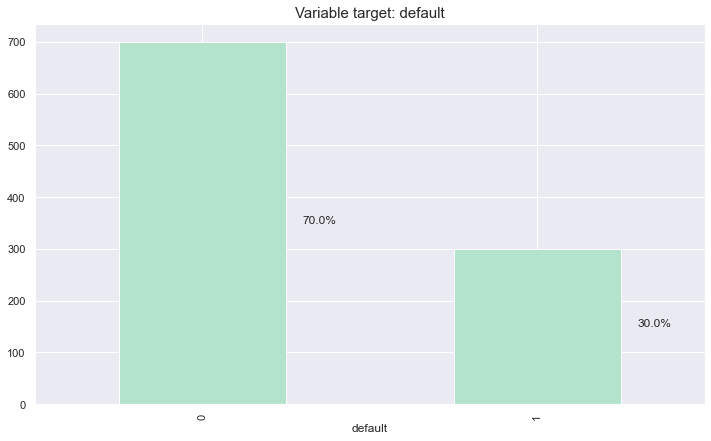

In [6]:
#Analizo variable target
data['default'] = data['default'].apply(lambda x: 1 if x == 2 else 0)

ax = data.groupby(['default']).size().plot(kind = 'bar', stacked=True, figsize = (12,7), cmap = 'Pastel2')
total = len(data)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() + 0.05
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y))
    
plt.title('Variable target: default', fontsize = 15)
plt.show()

La variable target tiene un 70% de valores 0, es decir de clientes que no tienen deudas, y un 30% de valores 1, clientes con deuda, calificados como alto riesgo para otorgar un crédito bancario. 
Lo importante del modelo es no clasificar un cliente como 'bueno' cuando no lo es. Es decir es muy importante clasificar bien a la clase 1 (malos). 
No sería tan grave clasificar a un cliente como 'malo' cuando es 'bueno'. 

### Análisis de variables categóricas: 
* checking_balance (Status of existing checking accoun): '< 0 DM', '1 - 200 DM', 'unknown', '> 200 DM'

* credit_history: 
    'critical': other credits existing (not at this bank), 
    'repaid', 
    'delayed': delay in paying off in the past 
    'fully repaid',
    'fully repaid this bank': all credits at this bank paid back duly

* purpose: 'radio/tv', 'education', 'furniture', 'car (new)', 'car (used)', 'business', 'domestic appliances',            'repairs', 'others', 'retraining' 

* savings_balance (Tipo de cuenta de ahorro que muestra tendencia de los prestatarios a ahorrar): 'unknown', '< 100 DM', '501 - 1000 DM', '> 1000 DM', '101 - 500 DM'

* employment_length: > 7 yrs', '1 - 4 yrs', '4 - 7 yrs', 'unemployed', '0 - 1 yrs'
* personal_status: 'single male', 'female', 'divorced male', 'married male'
* other_debtors: 'none', 'guarantor', 'co-applicant'
* property: 'real estate', 'building society savings', 'unknown/none', 'other'
* installment_plan : 'none', 'bank', 'stores'
* housing: 'own', 'for free', 'rent'
* telephone: 'yes', 'none'
* foreign_worker: 'yes', 'no'
* job: Present job: 'skilled employee', 'unskilled resident','mangement self-employed', 'unemployed non-resident'

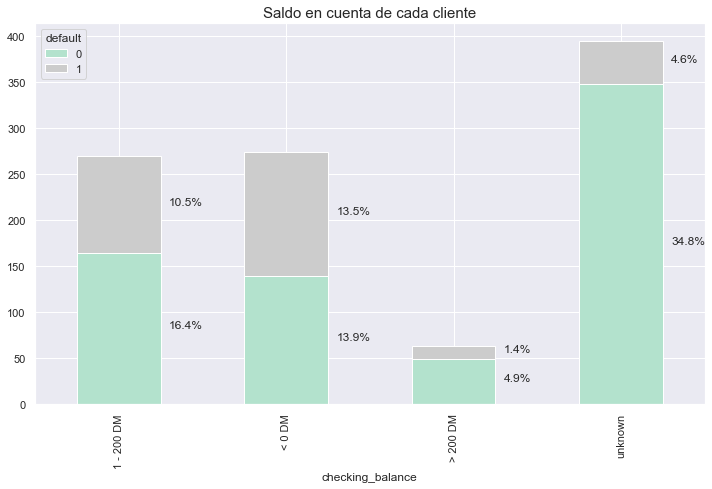

In [7]:
#Variable checking balance
graficar_variable(data,data['checking_balance'], data['default'])
plt.title('Saldo en cuenta de cada cliente', fontsize = 15)
plt.show()

In [8]:
#Muestro los datos en formato de tabla y agrego una columna que muestre el porcentaje del dataset que corresponde a cada categoría
crear_tabla(data,data['checking_balance'])

,Bajo_Riesgo,Alto_Riesgo,Porcentaje_dataset
checking_balance,,,
unknown,348,46,39.4
< 0 DM,139,135,27.4
1 - 200 DM,164,105,26.9
> 200 DM,49,14,6.3


- Con respecto a la variable 'checking_balance', un 39,4% de los casos son 'unknown', y dentro de este grupo hay un 11.67% de casos default = 2 que se refiere a clientes que tienen algun credito impago, es decir clasificados como alto riesgo crediticio.
- Luego, aquellos con mayor porcentaje de default son los que tienen salgo negativo en sus cuentas, seguido por aquellos que tienen entre 1-200 DM. 
- El menor porcentaje de default se encuentra en el grupo de aquellos  con más de 200DM en su cuenta bancaria. 

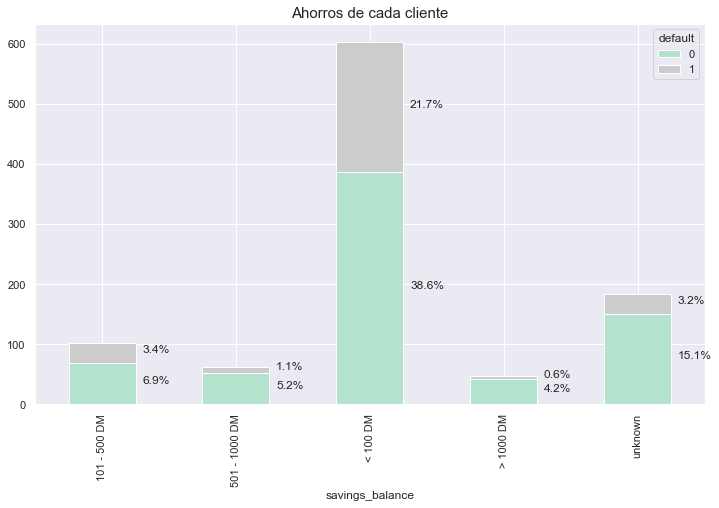

In [9]:
#Variable savings balance
graficar_variable(data,data['savings_balance'], data['default'])
plt.title('Ahorros de cada cliente', fontsize = 15)
plt.show()

In [10]:
#Muestro los datos en formato de tabla y agrego una columna que muestre el porcentaje del dataset que corresponde a cada categoría
crear_tabla(data,data['savings_balance'])

,Bajo_Riesgo,Alto_Riesgo,Porcentaje_dataset
savings_balance,,,
< 100 DM,386,217,60.3
unknown,151,32,18.3
101 - 500 DM,69,34,10.3
501 - 1000 DM,52,11,6.3
> 1000 DM,42,6,4.8


El grupo mayoritario, el 60,3%, es aquel con menor de 100 DM de ahorros, y el 36% de ellos (21,7% del total) han sido clasificados como default = 2 que se refiere a clientes que tienen algun credito impago. 
Hay un 18,3% de datos 'unknown'.
Con respecto a los otros 3 grupos, la cantidad de deudores va disminuyendo aa medida que aumenta la cantidad de ahorros: 
- Del grupo de ahorros entre 101-500 DM (que corresponde al 10,3% del total) los deudores corresponden al 3,4% del total
- Del grupo de ahorros entre 501-1000 DM (que corresponde al 6,3% del total) los deudores son el 1,1%.
- Del grupo con ahorros mayores a 1000 DM (que correponden al 4,8% del total), los deudores corresponden al 0,6% del total. 


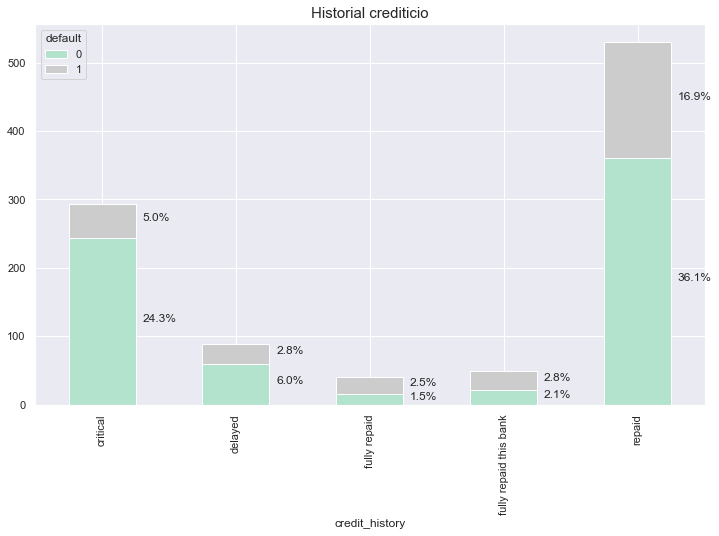

In [11]:
#Variable credit history
graficar_variable(data,data['credit_history'], data['default'])
plt.title('Historial crediticio', fontsize = 15)
plt.show()

In [12]:
#Muestro los datos en formato de tabla y agrego una columna que muestre el porcentaje del dataset que corresponde a cada categoría
crear_tabla(data,data['credit_history'])

,Bajo_Riesgo,Alto_Riesgo,Porcentaje_dataset
credit_history,,,
repaid,361,169,53.0
critical,243,50,29.3
delayed,60,28,8.8
fully repaid this bank,21,28,4.9
fully repaid,15,25,4.0


- En la variable credit_history vemos que el grupo mayoritario corresponde a la clasificación: repaid, 53% del total, que se refiere a aquellos que han ido cancelando correctamente los creditos que han solicitado hasta la fecha, siendo dentro de este grupo los que tienen créditos impagos, el 32%. 
- El segundo grupo es el de 'critical', que se refiere a que las cuentas son críticas o que tienen créditos en otros bancos, dentro de este grupo, un 17% está clasificado como alto riesgo crediticio.  
- Luego, aquellos que han tenido demoras o retardos en pagar créditos anteriores, corresponden al 8,8% del total, y un 32% dentro de este grupo son clasificados como alto riesgo crediticio. 
- El grupo que ha pagado todos sus créditos anteriores, corresponden al 4% del total del dataset, y más de la mitad de ellos, el 62,5%, son clasificados como alto riesgo crediticio. 
- El ultimo grupo, aquellos que han cancelado sus creditos con este banco, corresponden al 4,9% y un 57% son clasificados como alto riesgo. 


Siendo que, la clasificación fully repaid y fully repaid at this bank, tienen menos del 5% de los datos del dataset y tienen un porcentaje similar de casos de alto riesgo, los voy a unir en una sola variable: Fully repaid

In [13]:
list_credit = data['credit_history'].unique().tolist()
del list_credit[3:]
list_credit 
data['credit_history'].loc[~data['credit_history'].isin(list_credit)] = 'Fully Repaid'
data['credit_history'].unique()

/Users/eugeniabezek/opt/miniconda3/envs/datascience/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


array(['critical', 'repaid', 'delayed', 'Fully Repaid'], dtype=object)

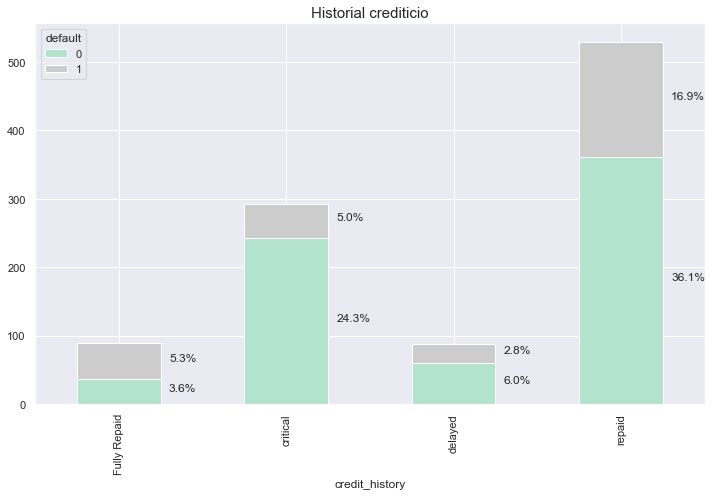

In [14]:
#Vuelvo a graficar la variable 
graficar_variable(data,data['credit_history'], data['default'])
plt.title('Historial crediticio', fontsize = 15)
plt.show()

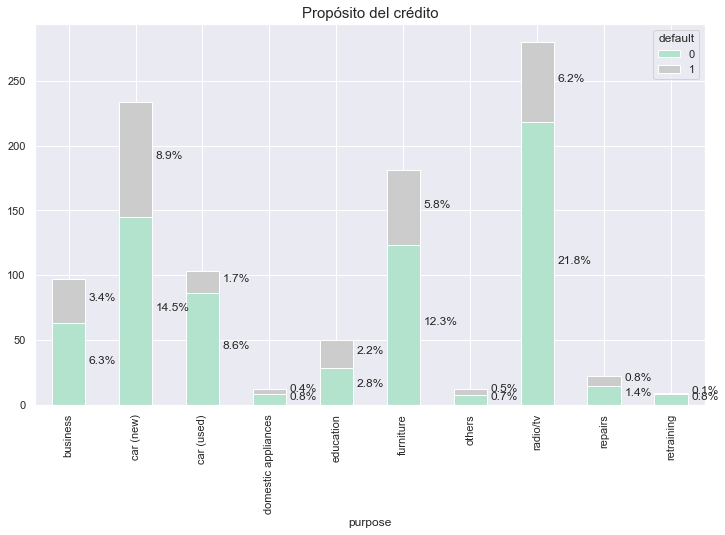

In [15]:
#Variable purpose
graficar_variable(data,data['purpose'], data['default'])
plt.title('Propósito del crédito', fontsize = 15)
plt.show()

In [16]:
#Muestro los datos en formato de tabla y agrego una columna que muestre el porcentaje del dataset que corresponde a cada categoría
crear_tabla(data,data['purpose'])

,Bajo_Riesgo,Alto_Riesgo,Porcentaje_dataset
purpose,,,
radio/tv,218,62,28.0
car (new),145,89,23.4
furniture,123,58,18.1
car (used),86,17,10.3
business,63,34,9.7
education,28,22,5.0
repairs,14,8,2.2
domestic appliances,8,4,1.2
others,7,5,1.2


La variable purpose muestra el propósito del crédito, vemos que la mayoria lo solicitó para adquirir una radio o una tv (el 28,1%), luego el 23,4% lo solicitó para comprar un auto nuevo, el 18,1% para muebles, el 10,3% para comprar un auto usado, el 9,7% para negocios, el 5% para educación, un 2,2% para reparaciones, 1,2%  para usos domésticos y el mismo porcentaje para 'otros', finalmente, un 0,9% lo solicitó para entrenamiento.

Teniendo en cuenta que las categorías domestic appliances, others, repairs y retraining tienen un porcentaje bajo de ocurrencia, voy a juntar a las 4 en una única categoría llamada others.

In [17]:
list_purpose = data['purpose'].unique().tolist()
del list_purpose[6:]

data['purpose'].loc[~data['purpose'].isin(list_purpose)] = 'Other'
data['purpose'].unique()

/Users/eugeniabezek/opt/miniconda3/envs/datascience/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


array(['radio/tv', 'education', 'furniture', 'car (new)', 'car (used)',
       'business', 'Other'], dtype=object)

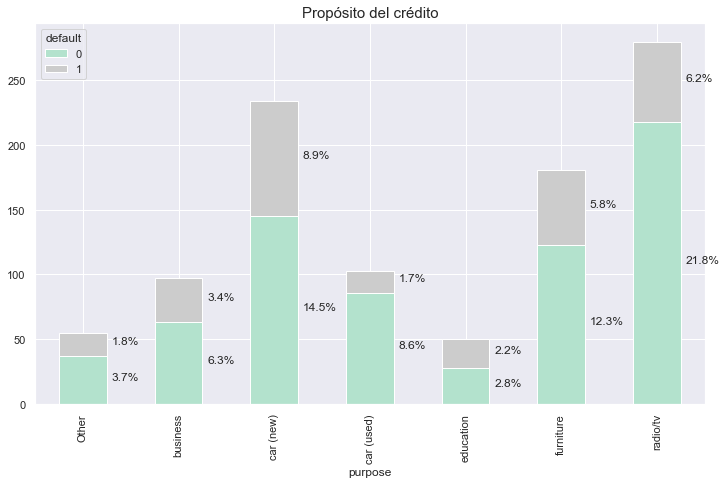

,Bajo_Riesgo,Alto_Riesgo,Porcentaje_dataset
purpose,,,
radio/tv,218,62,28.0
car (new),145,89,23.4
furniture,123,58,18.1
car (used),86,17,10.3
business,63,34,9.7
Other,37,18,5.5
education,28,22,5.0


In [18]:
#Vuelvo a graficar la variable purpose
graficar_variable(data,data['purpose'], data['default'])
plt.title('Propósito del crédito', fontsize = 15)
plt.show()

crear_tabla(data,data['purpose'])

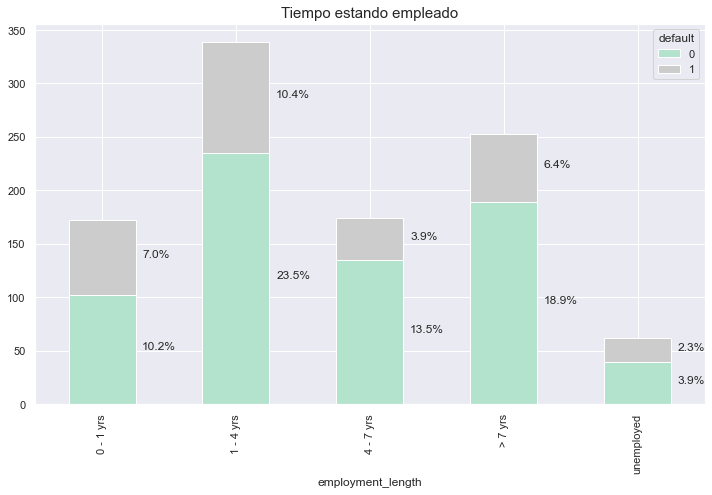

In [19]:
#Variable employment length
graficar_variable(data,data['employment_length'], data['default'])
plt.title('Tiempo estando empleado', fontsize = 15)
plt.show()

In [20]:
#Muestro los datos en formato de tabla y agrego una columna que muestre el porcentaje del dataset que corresponde a cada categoría
crear_tabla(data,data['employment_length'])

,Bajo_Riesgo,Alto_Riesgo,Porcentaje_dataset
employment_length,,,
1 - 4 yrs,235,104,33.9
> 7 yrs,189,64,25.3
4 - 7 yrs,135,39,17.4
0 - 1 yrs,102,70,17.2
unemployed,39,23,6.2


- 1-4 años de antigüedad laboral, corresponden al 33,9% del total del dataset, dentro de este grupo hay un 31% con alto riesgo crediticio. 
- Mayor a 7 años de antigüedad, corresponden al 26,3% del total del dataset, dentro de este grupo hay un 25% alto riesgo crediticio. 
- 4-7 años de antigüedad laboral, corresponden al 17,4% del total del dataset, dentro de este grupo hay un 22% alto riesgo crediticio. 
- 0-1 años de antigüedad laboral, corresponden al 17,2% del total del dataset, dentro de este grupo hay un 41% alto riesgo crediticio. 
- Desempleados, corresponde al 6,2% del total y hay un 37% de casos con alto riesgo crediticio. 


Los casos con mayor porcentaje de alto riesgo son los qe tienen menor antiegüedad laboral y los desempleados. 

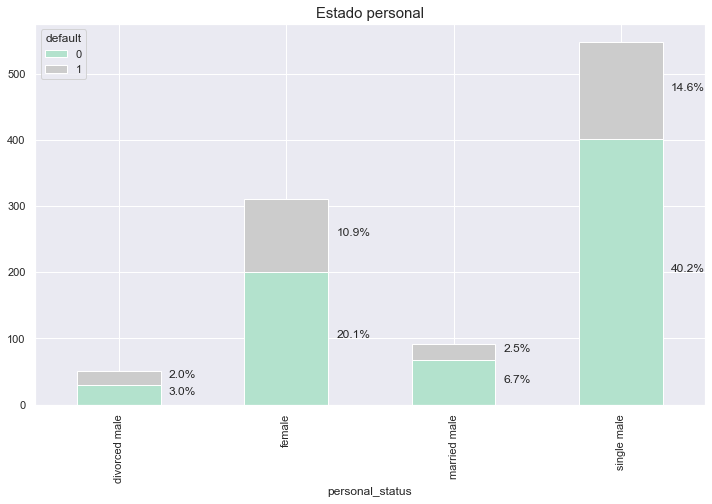

In [21]:
#Variable personal status
graficar_variable(data,data['personal_status'], data['default'])
plt.title('Estado personal', fontsize = 15)
plt.show()

In [22]:
#Muestro los datos en formato de tabla y agrego una columna que muestre el porcentaje del dataset que corresponde a cada categoría
crear_tabla(data,data['personal_status'])

,Bajo_Riesgo,Alto_Riesgo,Porcentaje_dataset
personal_status,,,
single male,402,146,54.8
female,201,109,31.0
married male,67,25,9.2
divorced male,30,20,5.0


El 54,8% de los datos correspondenden a personas de sexo masculino y con estado civil solteros, dentro del cual el 27% son clasificados con alto riesgo crediticio. 
El 30% del dataset correspode a individuos de sexo femenino, dentro del cual el 36% son clasificados con alto riesgo crediticio. 
El siguiente grupo corresponde a individuos masculinos casados, representando el 9,2% del dataset y dentro de este un 27% de alto riesgo.
Por ultimo, los individuos masculinos divorciados, son el 5% del dataset, y los clasificados con alto riesgo para otorgar un crédito son el 40%. 

Vemos que, el porcentaje de alto riesgo en masculinos solteros y casados, es similar, por lo que podemos juntarlos en una unica clasificación.


In [23]:
list_status = data['personal_status'].unique().tolist()
list_status.remove('single male')
list_status.remove('married male')

data['personal_status'].loc[~data['personal_status'].isin(list_status)] = 'Single-Married Male'
data['personal_status'].unique()

/Users/eugeniabezek/opt/miniconda3/envs/datascience/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


array(['Single-Married Male', 'female', 'divorced male'], dtype=object)

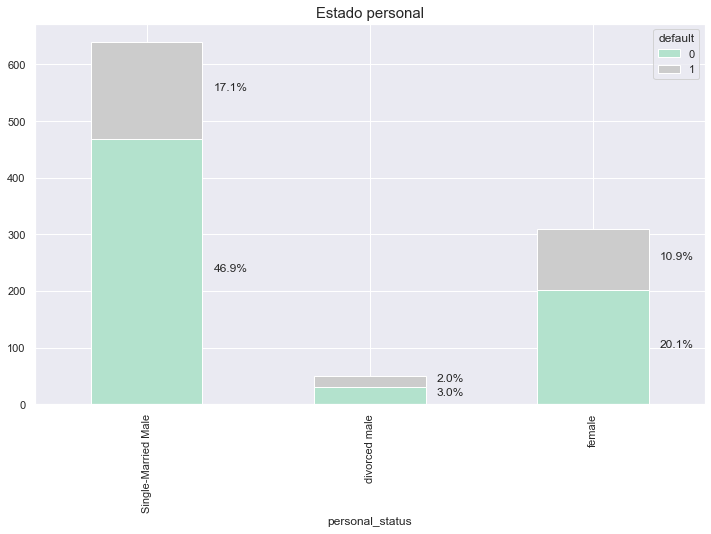

In [24]:
#Vuelvo a graficar
graficar_variable(data,data['personal_status'], data['default'])
plt.title('Estado personal', fontsize = 15)
plt.show()

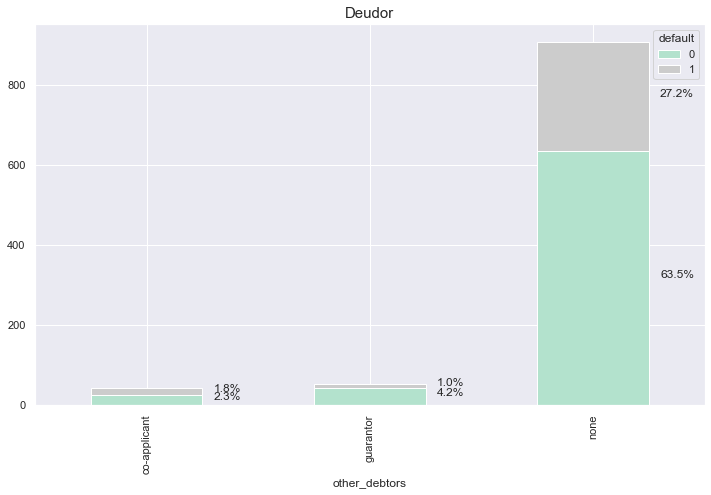

In [25]:
#Variable other debtors
graficar_variable(data,data['other_debtors'], data['default'])
plt.title('Deudor', fontsize = 15)
plt.show()

In [26]:
#Muestro los datos en formato de tabla y agrego una columna que muestre el porcentaje del dataset que corresponde a cada categoría
crear_tabla(data,data['other_debtors'])

,Bajo_Riesgo,Alto_Riesgo,Porcentaje_dataset
other_debtors,,,
none,635,272,90.7
guarantor,42,10,5.2
co-applicant,23,18,4.1


- El 90,7% de los datos corresponden a personas que no son ni garantes ni co deudores en otros créditos, y dentro de este grupo, el 30% tienen créditos impagos (alto riesgo). 
- El 4,1% del dataset son co-deudores de algun otro crédito, con un 43% de clasificados como alto riesgo.
- Y el 5,2% restante del dataset, que corresponde a aquellos que han salido como garantes en algun otro crédito, el 19% han sido clasificados como alto riesgo. 

Podemos decir que, en los casos en los que el cliente es co-deudor de algun otro crédito, hay un alto porcentaje que tienen créditos impagos. 

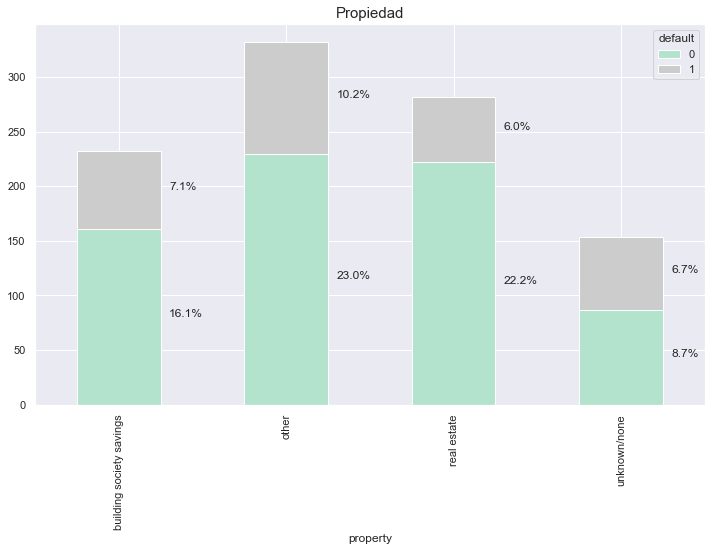

In [27]:
#Variable property
graficar_variable(data,data['property'], data['default'])
plt.title('Propiedad', fontsize = 15)
plt.show()

In [28]:
#Muestro los datos en formato de tabla y agrego una columna que muestre el porcentaje del dataset que corresponde a cada categoría
crear_tabla(data,data['property'])

,Bajo_Riesgo,Alto_Riesgo,Porcentaje_dataset
property,,,
other,230,102,33.2
real estate,222,60,28.2
building society savings,161,71,23.2
unknown/none,87,67,15.4


- Con respecto a la variable propiedad, el 33,2% de los clientes del dataset están en el grupo: other, que corresponde a aquellos que poseen otro tipo de propiedad, como un auto, y dentro de este el 31% son de alto riesgo. 
- Aquellos que poseen una vivienda, son el 30,2% del dataset y el porcentaje de alto riesgo dentro de este grupo es 20%.
- Luego, el 23,2% del dataset corresponde a aquellos que presentan ahorros en una sociedad constructora, con un 31% de alto riesgo.
- Finalmente, el grupo que no se conoce si posee alguna propiedad o no posee ninguna, corresponde al 15,4% del dataset y un 44% de alto riesgo dentro de ese grupo. 

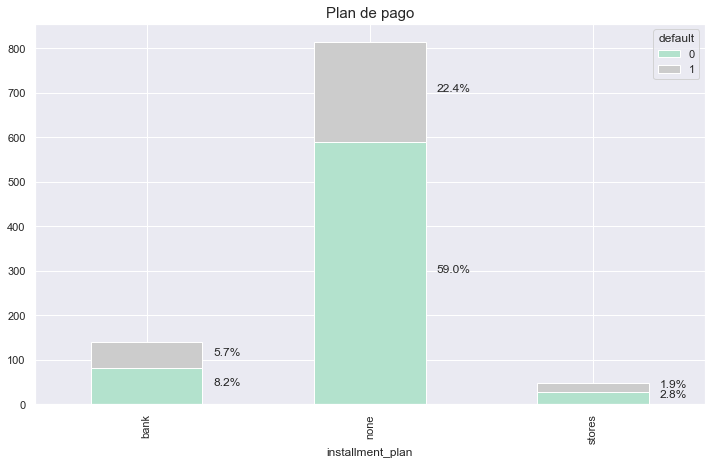

In [29]:
#Variable installment plan
graficar_variable(data,data['installment_plan'], data['default'])
plt.title('Plan de pago', fontsize = 15)
plt.show()

In [30]:
#Muestro los datos en formato de tabla y agrego una columna que muestre el porcentaje del dataset que corresponde a cada categoría
crear_tabla(data,data['installment_plan'])

,Bajo_Riesgo,Alto_Riesgo,Porcentaje_dataset
installment_plan,,,
none,590,224,81.4
bank,82,57,13.9
stores,28,19,4.7


- El 81,4% del dataset no tiene otro plan de pago. 
- El 13,9% tiene un plan de pago en bancos, 41% de los cuales tienen creditos impagos
- El 4,7% restante, tiene un plan de pago en tiendas, 40% de los cuales tambien tiene creditos impagos.

Al ser la proporcion de clasificados con alto riesgo similar en el caso de que tengan un plan de pago tanto en banco como en tienda, los voy a unir en una misma variable que se llamará: yes

In [31]:
#Me quedo unicamente con dos categorias, none or yes 
list_installment = data['installment_plan'].unique().tolist()
list_installment.remove('none')

data['installment_plan'].loc[data['installment_plan'].isin(list_installment)] = 'yes'

/Users/eugeniabezek/opt/miniconda3/envs/datascience/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


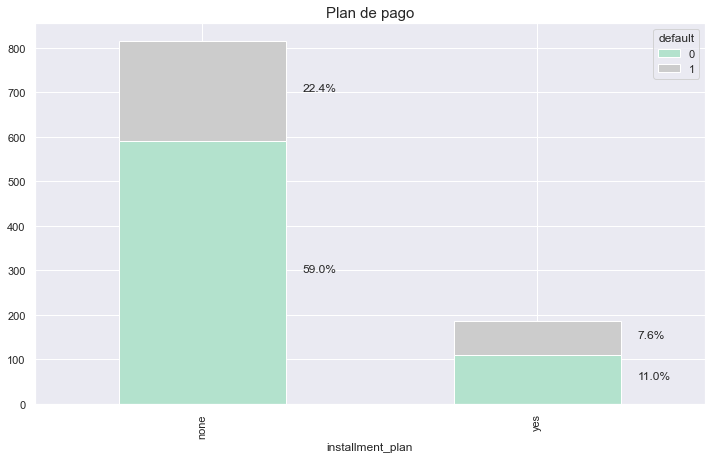

,Bajo_Riesgo,Alto_Riesgo,Porcentaje_dataset
installment_plan,,,
none,590,224,81.4
yes,110,76,18.6


In [32]:
graficar_variable(data,data['installment_plan'], data['default'])
plt.title('Plan de pago', fontsize = 15)
plt.show()

crear_tabla(data,data['installment_plan'])

Seguimos viendo que, de aquellos clientes que tienen un plan de pago, que ahora representan el 18,6% de clientes del dataset, el porcentaje de los clasificados con alto riesgo sigue siendo del 40%. 

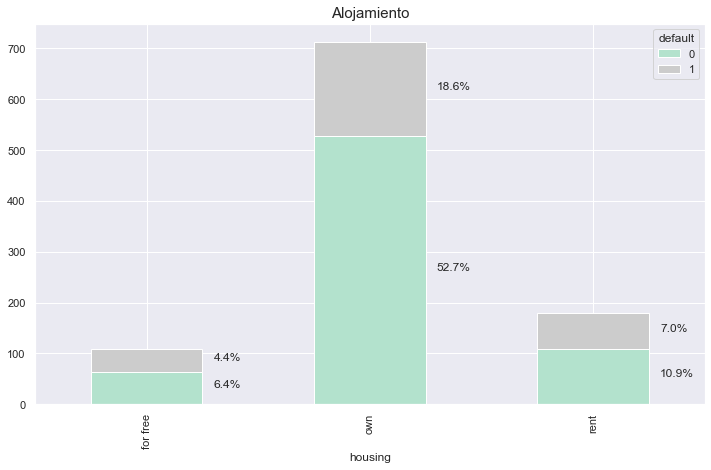

In [33]:
#Variable housing
graficar_variable(data,data['housing'], data['default'])
plt.title('Alojamiento', fontsize = 15)
plt.show()

In [34]:
#Muestro los datos en formato de tabla y agrego una columna que muestre el porcentaje del dataset que corresponde a cada categoría
crear_tabla(data,data['housing'])

,Bajo_Riesgo,Alto_Riesgo,Porcentaje_dataset
housing,,,
own,527,186,71.3
rent,109,70,17.9
for free,64,44,10.8


- El 71,3% del dataset tiene una casa propia, dentro de este grupo un 26% ha sido clasificado con alto riesgo crediticio. 
- Luego, el 17,9% del dataset alquila una propiedad, siendo el porcentaje de los clasificados con alto riesgo, 39%.
- Por ultimo, el porcentaje de quienes tienen un alojamiento gratis es de 10,8%, siendo el grupo clasificado con alto riesgo 41%.

Siendo la proporcion de alto riesgo en el caso de los que alquilan y los que están gratis, la misma, podemos unirlos en una única categoría: Not own. 

In [35]:
#Me quedo unicamente con dos categorias, own y not own 
data['housing'][data['housing'] != 'own'] = 'not own'

<ipython-input-35-90b4ab5e163c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['housing'][data['housing'] != 'own'] = 'not own'


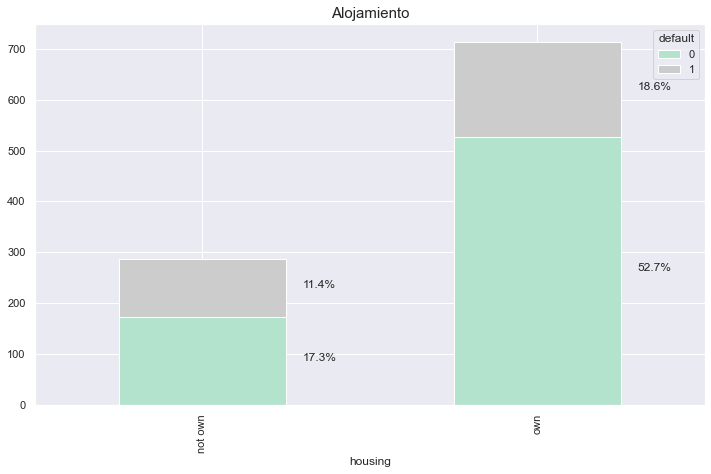

In [36]:
#Vuelvo a graficar la variable housing
graficar_variable(data,data['housing'], data['default'])
plt.title('Alojamiento', fontsize = 15)
plt.show()

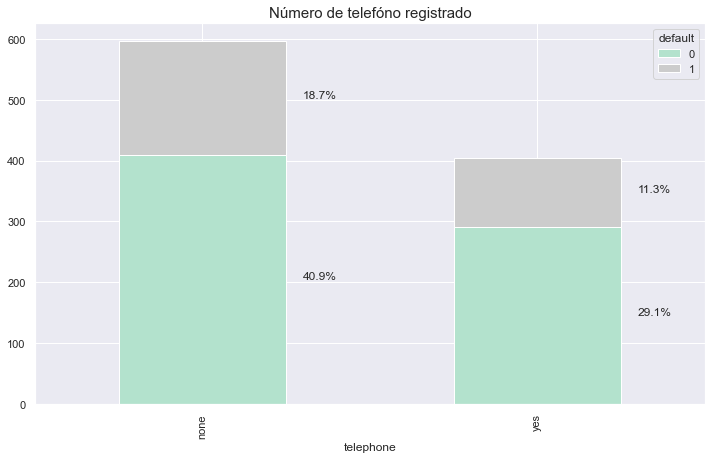

In [37]:
#Variable telephone
graficar_variable(data,data['telephone'], data['default'])
plt.title('Número de telefóno registrado', fontsize = 15)
plt.show()

In [38]:
#Muestro los datos en formato de tabla y agrego una columna que muestre el porcentaje del dataset que corresponde a cada categoría
crear_tabla(data,data['telephone'])

,Bajo_Riesgo,Alto_Riesgo,Porcentaje_dataset
telephone,,,
none,409,187,59.6
yes,291,113,40.4


El banco posee información sobre el número de contacto del 40,4% de los clientes del dataset, del otro 59,6% no lo tiene.
De los clientes de los que posee el numero de contacto, el 28% ha sido clasificado como alto riesgo. De los que no posee el contacto, el 31% tiene esa clasificación. 
La estadística en ambos grupos es similar, por lo que podria desestimarse esta variable para el entrenamiento del modelo. 

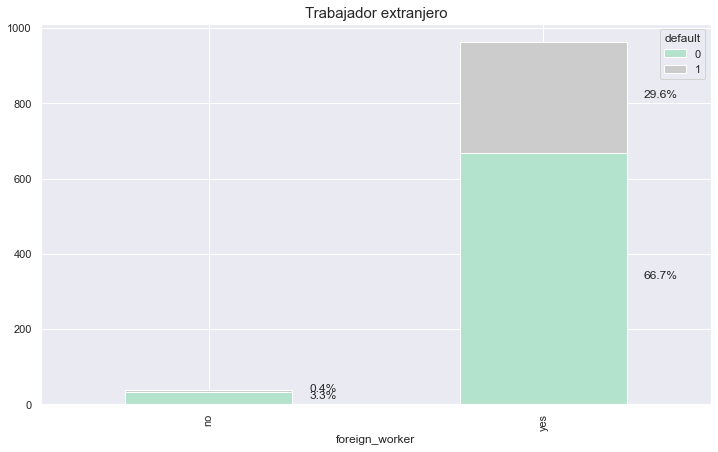

In [39]:
#Variable foreign worker
graficar_variable(data,data['foreign_worker'], data['default'])
plt.title('Trabajador extranjero', fontsize = 15)
plt.show()

In [40]:
#Muestro los datos en formato de tabla y agrego una columna que muestre el porcentaje del dataset que corresponde a cada categoría
crear_tabla(data,data['foreign_worker'])

,Bajo_Riesgo,Alto_Riesgo,Porcentaje_dataset
foreign_worker,,,
yes,667,296,96.3
no,33,4,3.7


La gran mayoria de los clientes del dataset son trabajadores extrnajeros, el 96,3%, siendo un 31% clasificados como que tienen creditos impagos. 
Y dentro del grupo que no son trabajadores extranjeros, el 3,7%, hay un 11% de clasificados como alto riesgo crediticio. 

Siendo tan bajo el porcentaje de los que no son trabajadores extrnajeros, podríamos prescindir de esta variable para entrenar el modelo. 

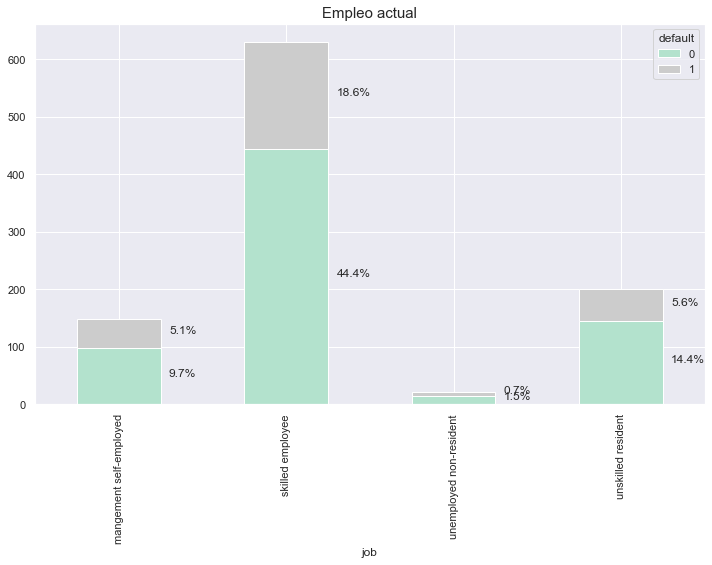

In [41]:
#Variable job
graficar_variable(data,data['job'], data['default'])
plt.title('Empleo actual', fontsize = 15)
plt.show()

In [42]:
#Muestro los datos en formato de tabla y agrego una columna que muestre el porcentaje del dataset que corresponde a cada categoría
crear_tabla(data,data['job'])

,Bajo_Riesgo,Alto_Riesgo,Porcentaje_dataset
job,,,
skilled employee,444,186,63.0
unskilled resident,144,56,20.0
mangement self-employed,97,51,14.8
unemployed non-resident,15,7,2.2


- El 63% de los clientes del dataset corresponden a la clasificacion 'empleado calificado', considerando unicamente a este grupo, un 30% tiene creditos impagos. 
- El grupo que sigue es el de residentes no calificados, con un 20% del total, con un porcentaje de impagos del 28% dentro de este grupo.
- Un 14,8% de los datos corresponden a empleados con gestión autónoma, con un 34% dentro de este grupo con créditos impagos.
- El ultimo grupo, representa el 2,2% de los datos, desempleados no residentes, con un 32% de creditos impagos. 

### Análisis de variables numéricas:
* months_loan_duration: Duración del préstamo en meses, variable numérica
* amount: Cantidad de dinero solicitada
* installment_rate: Tasa de pago (Installment rate in percentage of disposable income)
* resident_history: (Present residence since ): 4, 2, 3, 1. 
* age: Desde 19 hasta 75 años 
* existing_credits: (Number of existing credits at this bank: 1, 2, 3, 4
* dependents: (Number of people being liable to provide maintenance for ): 1 o 2 
* default: 1 o 2  VARIABLE TARGET INDICA EL IMPAGO DE CREDITOS




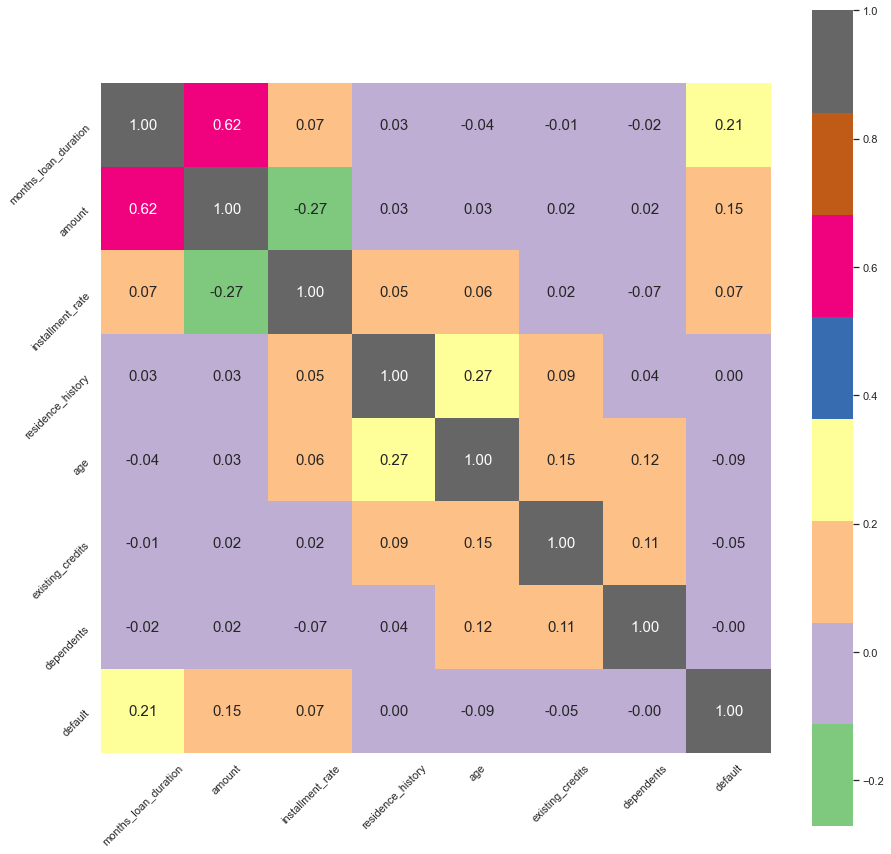

In [43]:
#Mapa de calor que representa el grado de correlación entre las variables numéricas. 

col_num = ['months_loan_duration', 'amount', 'installment_rate', 'residence_history', 'age', 'existing_credits', 'dependents', 
       'default']
corr = data[col_num].corr()

plt.figure(figsize=(15,15))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= data[col_num].columns, 
           yticklabels= data[col_num].columns,
           cmap= 'Accent')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

En el mapa de calor podemos ver que las variables months_loan_duration y amount son las que estan mas correlacionadas, lo cual tiene sentido ya que, al solicitar una cantidad mayor de dinero, el tiempo dentro del cual se debe devolver al banco es mayor y viceversa. 

In [44]:
#Descripcion estadistica de las variables numericas 
data[col_num].describe()

,months_loan_duration,amount,installment_rate,residence_history,age,existing_credits,dependents,default
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000


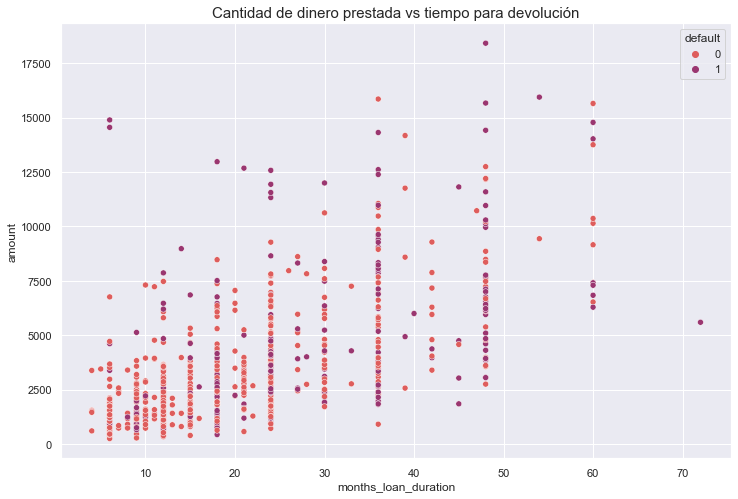

In [45]:
#Variable amount y months_loan_duration
plt.figure(figsize = (12,8))
sns.scatterplot(data = data, y = 'amount', x = 'months_loan_duration', hue = 'default', palette = 'flare')
plt.title('Cantidad de dinero prestada vs tiempo para devolución', fontsize = 15)
plt.show()

En el grafico podemos ver la tendencia con pendiente 0,62 entre las dos variables, igualmente hay que aclarar que para una misma cantidad solicitada hay distintos meses de duración, lo cual debe depender de otras variables que indican el perfil del cliente. 

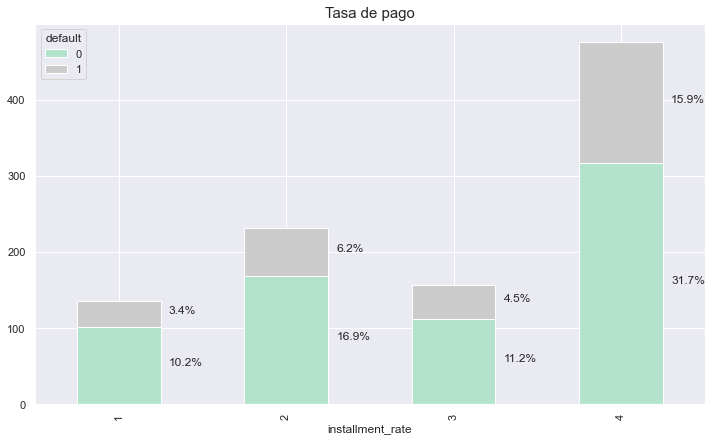

,Bajo_Riesgo,Alto_Riesgo,Porcentaje_dataset
installment_rate,,,
4,317,159,47.6
2,169,62,23.1
3,112,45,15.7
1,102,34,13.6


In [46]:
#Variable installment_rate
graficar_variable(data,data['installment_rate'], data['default'])
plt.title('Tasa de pago', fontsize = 15)
plt.show()

crear_tabla(data,data['installment_rate'])

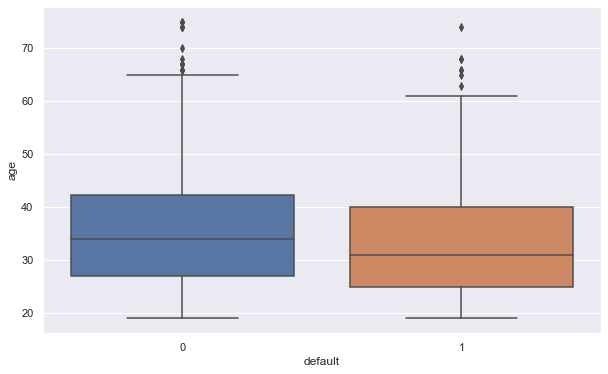

In [47]:
#Variable age
plt.figure(figsize = (10,6))
sns.boxplot(data = data, x = 'default', y = 'age')
plt.show()

In [48]:
prom_edad_nodefault = data['age'][data['default'] == 1].mean()
prom_edad_default = data['age'][data['default'] == 2].mean()

print('La edad promedio de aquellos clasificados con alto riesgo es de ', format(prom_edad_default,'.0f'), 'mientras que, la edad promedio de aquellos sin creditos impagos es ', format(prom_edad_nodefault,'.0f'))

La edad promedio de aquellos clasificados con alto riesgo es de  nan mientras que, la edad promedio de aquellos sin creditos impagos es  34


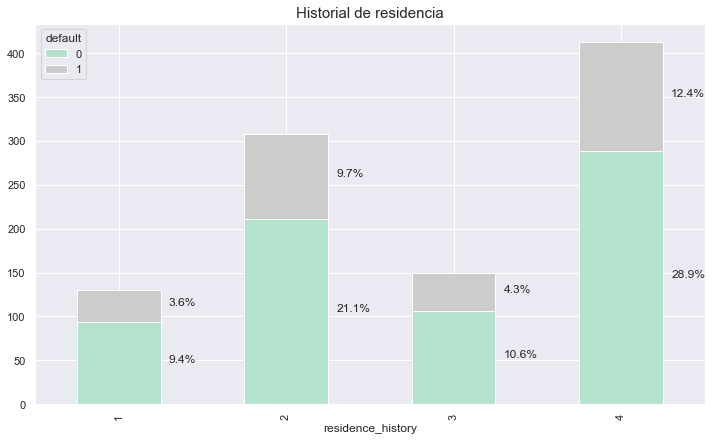

,Bajo_Riesgo,Alto_Riesgo,Porcentaje_dataset
residence_history,,,
4,289,124,41.3
2,211,97,30.8
3,106,43,14.9
1,94,36,13.0


In [49]:
#Variable residence_history
graficar_variable(data,data['residence_history'], data['default'])
plt.title('Historial de residencia', fontsize = 15)
plt.show()

crear_tabla(data,data['residence_history'])

- El mayor porcentaje, 41,3%, son aquellos con 4 años de antigüedad en su vivienda, de los cuales un 30% han sido clasificados como alto riesgo. 
- Los que tienen 2 años de antiguedad, el 30,8% del dataset, tienen un 31% de deudores.
- Los que tienen 3 años de antigüedad en su vivienda, tienen un 29% de deudores.
- Por ultimo, los que tienen 1 año de antigüedad en su vivienda,tienen un 28% de deudores. 

Vemos que no hay mucha relación entre la antigüedad de vivienda y el porcentaje de imapagos, por lo que esta variable puede desestimarse para el análisis.

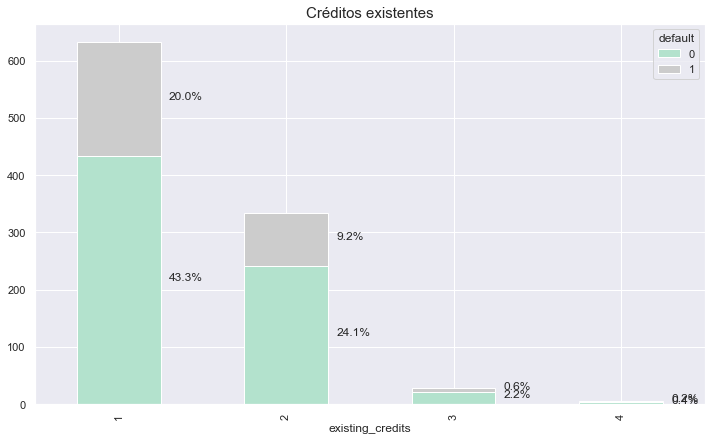

,Bajo_Riesgo,Alto_Riesgo,Porcentaje_dataset
existing_credits,,,
1,433,200,63.3
2,241,92,33.3
3,22,6,2.8
4,4,2,0.6


In [50]:
#Variable existing_credits
graficar_variable(data,data['existing_credits'], data['default'])
plt.title('Créditos existentes', fontsize = 15)
plt.show()

tabla_existing_cred = crear_tabla(data,data['existing_credits'])
tabla_existing_cred

In [51]:
porc_existing_1 = format(tabla_existing_cred.iloc[0,1]*100/(tabla_existing_cred.iloc[0,0]+tabla_existing_cred.iloc[0,1]), '.2f')
porc_existing_2 = format(tabla_existing_cred.iloc[1,1]*100/(tabla_existing_cred.iloc[1,0]+tabla_existing_cred.iloc[1,1]), '.2f')
porc_existing_3 = format(tabla_existing_cred.iloc[2,1]*100/(tabla_existing_cred.iloc[2,0]+tabla_existing_cred.iloc[2,1]), '.2f')
porc_existing_4 = format(tabla_existing_cred.iloc[3,1]*100/(tabla_existing_cred.iloc[3,0]+tabla_existing_cred.iloc[3,1]), '.2f')

print('Porcentaje de clientes con creditos impagos, que tienen 1 credito existente: ', porc_existing_1)
print('Porcentaje de clientes con creditos impagos, que tienen 2 creditos existentes: ', porc_existing_2)
print('Porcentaje de clientes con creditos impagos, que tienen 3 creditos existentes: ', porc_existing_3)
print('Porcentaje de clientes con creditos impagos, que tienen 4 creditos existentes: ', porc_existing_4)

Porcentaje de clientes con creditos impagos, que tienen 1 credito existente:  31.60
Porcentaje de clientes con creditos impagos, que tienen 2 creditos existentes:  27.63
Porcentaje de clientes con creditos impagos, que tienen 3 creditos existentes:  21.43
Porcentaje de clientes con creditos impagos, que tienen 4 creditos existentes:  33.33


La mayor parte de los clientes del dataset tienen un unico credito en el banco, pero tomando cada grupo por separado, el porcentaje de los que tienen creditos impagos es similar en todos los grupos. 

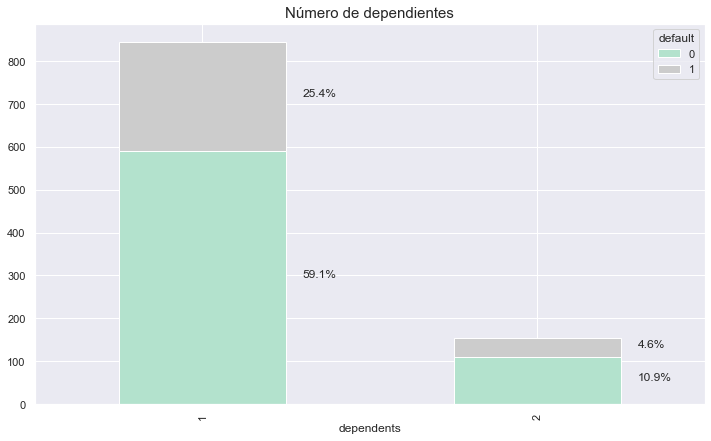

,Bajo_Riesgo,Alto_Riesgo,Porcentaje_dataset
dependents,,,
1,591,254,84.5
2,109,46,15.5


In [52]:
#Variable dependents, esta variable se refiere a la cantidad de personas a las que el cliente debe mantener 
graficar_variable(data,data['dependents'], data['default'])
plt.title('Número de dependientes', fontsize = 15)
plt.show()

tabla_dependents = crear_tabla(data,data['dependents'])
tabla_dependents

In [53]:
dependents_1 = format(tabla_dependents.iloc[0,1]*100/(tabla_existing_cred.iloc[0,0]+tabla_existing_cred.iloc[0,1]), '.2f')
dependents_2 = format(tabla_dependents.iloc[1,1]*100/(tabla_existing_cred.iloc[1,0]+tabla_existing_cred.iloc[1,1]), '.2f')

print('Porcentaje de clientes con creditos impagos, que tienen un dependiente es: ', dependents_1)
print('Porcentaje de clientes con creditos impagos, que tienen dos dependientes es: ', dependents_2)


Porcentaje de clientes con creditos impagos, que tienen un dependiente es:  40.13
Porcentaje de clientes con creditos impagos, que tienen dos dependientes es:  13.81


### Preparación de los datos para el modelo

#### Binarización de las variables categoricas

In [54]:
cols = ['checking_balance', 'credit_history', 'savings_balance','purpose', 'employment_length', 
        'personal_status', 'other_debtors', 'property', 'installment_plan', 'housing', 'job',]

data_categorical = data[cols]
data_categorical = pd.concat([pd.get_dummies(data_categorical[col], prefix=col) for col in data_categorical], axis=1)
data_categorical.head()
data = pd.concat([data[data.columns[~data.columns.isin(cols)]], data_categorical], axis=1)
data.head()

,months_loan_duration,amount,installment_rate,residence_history,age,existing_credits,default,dependents,telephone,foreign_worker,...,property_real estate,property_unknown/none,installment_plan_none,installment_plan_yes,housing_not own,housing_own,job_mangement self-employed,job_skilled employee,job_unemployed non-resident,job_unskilled resident
0,6,1169,4,4,67,2,0,1,yes,yes,...,1,0,1,0,0,1,0,1,0,0
1,48,5951,2,2,22,1,1,1,none,yes,...,1,0,1,0,0,1,0,1,0,0
2,12,2096,2,3,49,1,0,2,none,yes,...,1,0,1,0,0,1,0,0,0,1
3,42,7882,2,4,45,1,0,2,none,yes,...,0,0,1,0,1,0,0,1,0,0
4,24,4870,3,4,53,2,1,2,none,yes,...,0,1,1,0,1,0,0,1,0,0


In [56]:
#Separo la variable target del resto de las variables

y = data['default']
X = data.drop(['default', 'telephone', 'foreign_worker', 'residence_history'], axis = 1)


print(y.shape, X.shape)


(1000,) (1000, 49)


In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 42, stratify = y)

In [58]:
y_train[y_train == 0].count()

490

In [59]:
y_train[y_train == 1].count()

210

In [60]:
#Escalo los datos
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
X_train = scl.fit_transform(X_train)
X_test = scl.transform(X_test)

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, make_scorer
import sklearn.metrics as metrics

def modelo_arboles(max_depths, X_train, y_train, X_test, y_test):
    # Definimos las listas vacias para los valores de error cuadratico medio deseados
    lista_error_train = []
    lista_error_test = []



    for max_depth in max_depths:
    
        clf = DecisionTreeClassifier(max_depth = max_depth, random_state = 42, criterion = 'gini')
        clf.fit(X_train, y_train)
    
        # Predecir y evaluar sobre el set de entrenamiento
        y_train_pred = clf.predict(X_train)
        precision_train = metrics.precision_score(y_train, y_train_pred)
    
        # Predecir y evaluar sobre el set de evaluación
        y_test_pred = clf.predict(X_test)
        precision_test = metrics.precision_score(y_test, y_test_pred)
    
        #Agrego la informacion a las listas
        lista_error_train.append(precision_train)
        lista_error_test.append(precision_test)
        
    return lista_error_train, lista_error_test                     

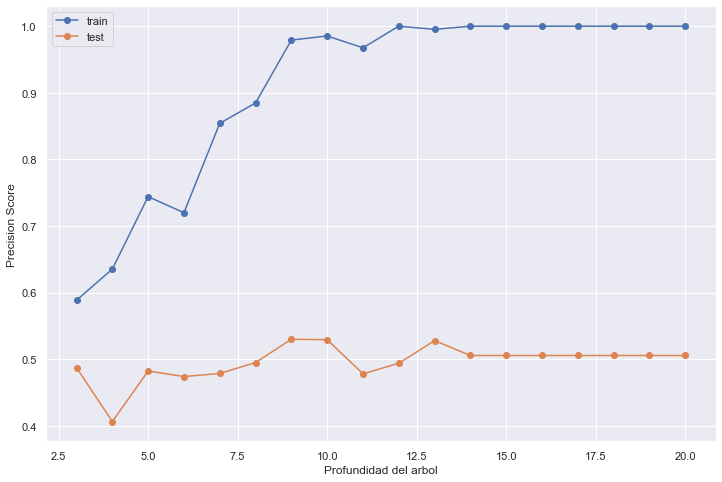

In [62]:
max_depths = np.arange(3,21)

lista_error_train, lista_error_test  = modelo_arboles(max_depths, X_train, y_train, X_test, y_test)

#Grafico
plt.figure(figsize = (12,8))
plt.plot(max_depths,lista_error_train,'o-',label='train' )
plt.plot(max_depths,lista_error_test,'o-',label='test')
plt.legend()
plt.xlabel('Profundidad del arbol')
plt.ylabel('Precision Score')
plt.show() 

In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
#Creo un modelo de arbol de decision con max_depth = 13 que es el que mayor precisión me dio 
clf = DecisionTreeClassifier(random_state = 0, max_depth=13)
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
score_train = cross_val_score(clf, X_train, y_train, scoring = 'precision', cv = 5)
score_test = cross_val_score(clf, X_test, y_test, scoring = 'precision', cv = 5)
print('Precision score Train: ',score_train.mean())
print('Precision score Test: ',score_test.mean())

Precision score Train:  0.45844279751256495
Precision score Test:  0.5007352941176471


#### Matriz de confusión

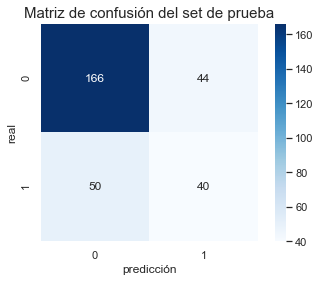

In [64]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.title('Matriz de confusión del set de prueba', fontsize = 15)
plt.xlabel("predicción")
plt.ylabel("real")
plt.show()

De los 90 casos de la clase minoritaria que es la que nos interesa predecir bien, el modelo sólo pudo clasificar correctamente a 40 de 90, es decir al 44%.

In [65]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       210
           1       0.48      0.44      0.46        90

    accuracy                           0.69       300
   macro avg       0.62      0.62      0.62       300
weighted avg       0.68      0.69      0.68       300



El reporte nos da un resumen de las métricas del modelo que entrenamos, podemos ver que para la clase mayoritaria, que es la clase 0, tiene una precision de 0,77, un recall de 0,79 y un f1-score de 0,78. 
En cuanto a la clase minoritaria, los resultados no son muy buenos, ya que nos da aproximadamente 0,5 en todas las métricas, lo cual indica que clasifica casi aleatoriamente.
Recall, indica la Tasa de verdaderos positivos Recall = TP/(TP + FN), indica que tan bueno es el modelo para predecir la clase positiva. 
La precisión, es TP/(TP + FP), es decir de todos los que el modelo predijo positivos, cuantos eran realmente positivos? 
En ambas mediciones, tenemos un valor de 0,5 aprox. para la clase que mas nos interesa medir, por lo cual podemos concluir que el modelo no es bueno clasificando estos clientes. 


#### Curva ROC
#### Created by plotting the true positive rate (TPR) against the false positive rate (FPR)

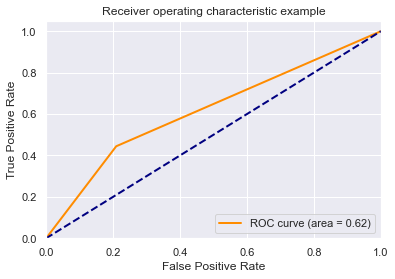

In [67]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

El área debajo de la curva representa la habilidad del modelo para discriminar entre la clase negativas y la positiva. Un área de 1 representa un modelo que ha hecho todas las predicciones perfectas, mientras que un área de 0.5 representa el rendimiento de un modelo aleatorio. En este caso, el area es 0,62. Lo cual esta un poco por encima de ser aleatorio. 

#### Reglas de decisión obtenidas del árbol de decisión

In [68]:
from sklearn.tree import export_text
features =(X.columns).tolist()
str_features = [str(int) for int in features]
target = y.unique().tolist()
str_target = [str(int) for int in target]
text_representation = export_text(clf, feature_names = features)
print(text_representation)

|--- checking_balance_unknown <= 0.22
|   |--- months_loan_duration <= -0.52
|   |   |--- property_real estate <= 0.48
|   |   |   |--- amount <= -0.66
|   |   |   |   |--- age <= 1.19
|   |   |   |   |   |--- credit_history_critical <= 0.46
|   |   |   |   |   |   |--- employment_length_> 7 yrs <= 0.54
|   |   |   |   |   |   |   |--- other_debtors_none <= -1.42
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- other_debtors_none >  -1.42
|   |   |   |   |   |   |   |   |--- savings_balance_501 - 1000 DM <= 1.88
|   |   |   |   |   |   |   |   |   |--- checking_balance_> 200 DM <= 1.80
|   |   |   |   |   |   |   |   |   |   |--- amount <= -0.99
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- amount >  -0.99
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- checking_balance_> 200 DM >  1.80
|   |   |   |   |   |   |   |   |   |   |--- 

En cuanto a las reglas de decisión que creó el modelo podemos ir describiendolas de la siguiente manera:
- Regla 1:
Analiza primero la variable y define que si:
* checking_balance_unknown <= 0.22, y 
* months_loan_duration <= -0.52, y 
* property_real estate <= 0.48, y 
* amount <= -0.66, y age <= 1.19, y 
* credit_history_critical <= 0.46, y 
* employment_length_> 7 yrs <= 0.54, y 
* other_debtors_none <= -1.42, 
* Entonces le corresponde la class: 0

Y asi sucesivamente con las siguientes reglas. 

#### Estructura del árbol

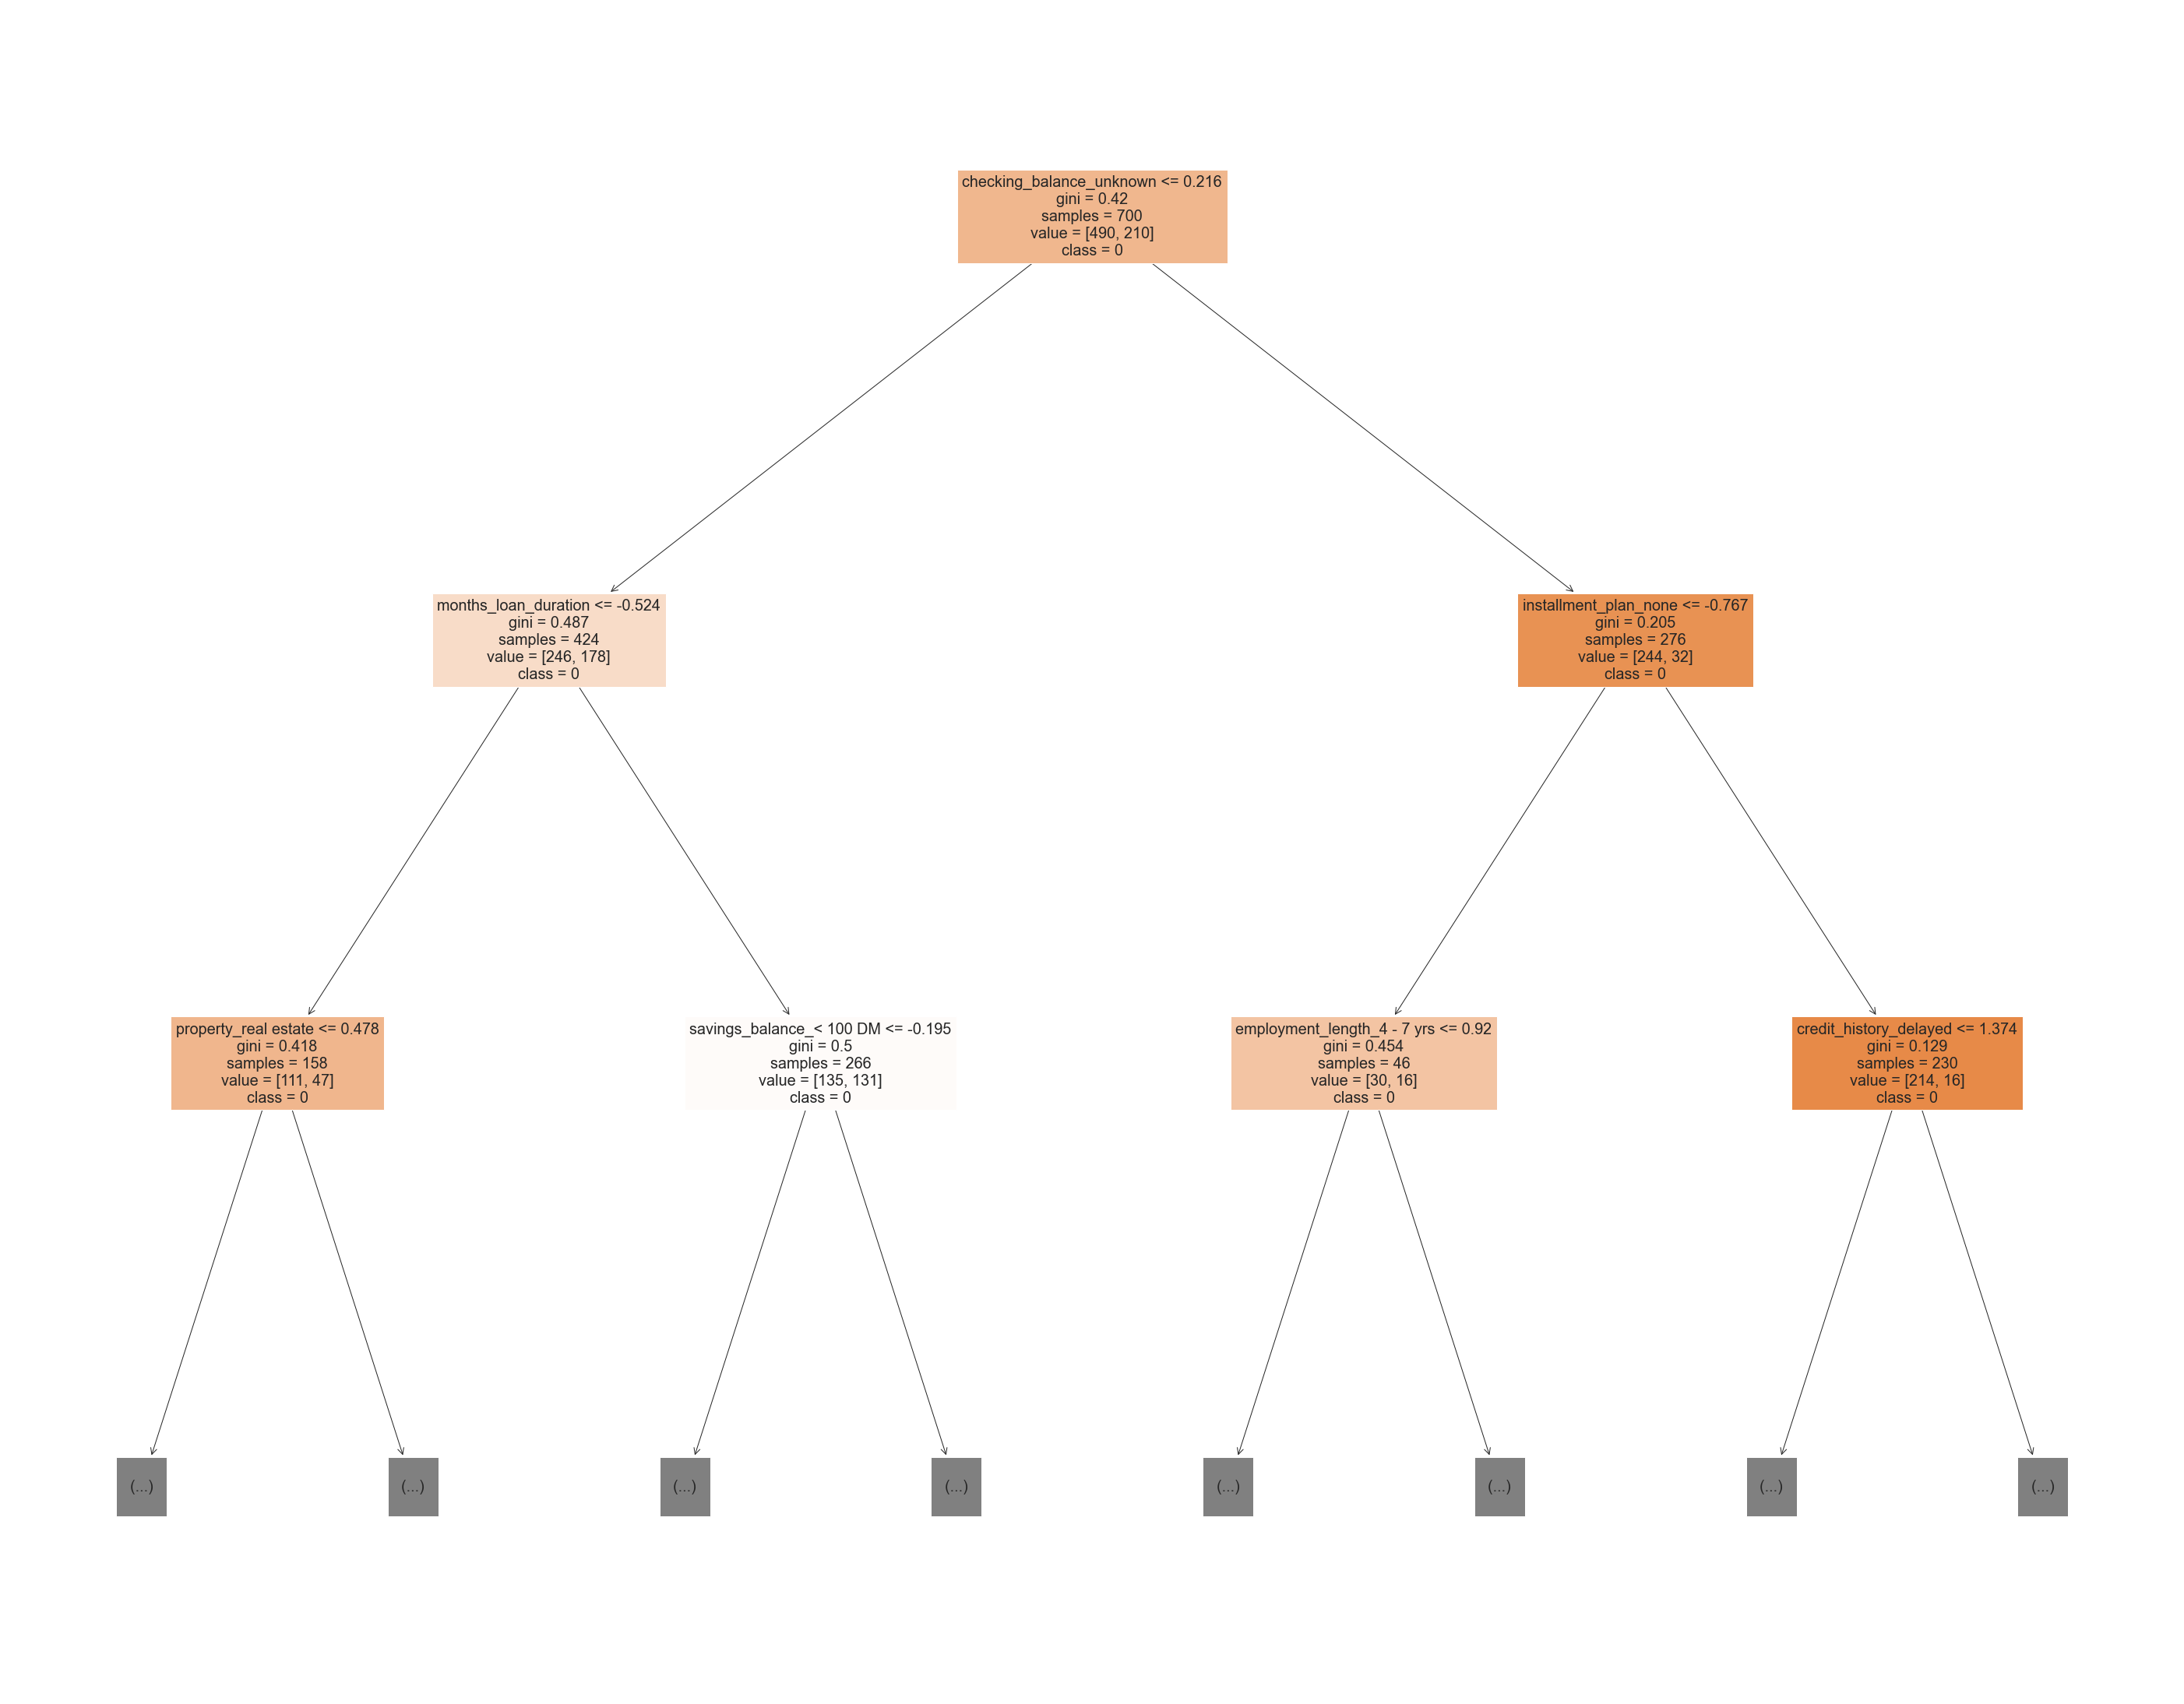

In [70]:
from sklearn import tree
fig = plt.figure(figsize=(50,40))
_ = tree.plot_tree(clf, 
                   feature_names=str_features,  
                   class_names=str_target,
                   filled=True,
                  max_depth = 2)

En el grafico de arriba vemos la estructura del árbol de decisión, en cada nodo de decisión realiza el cálculo del índice Gini, el cual lo podemos como una función de costo utilizada para evaluar divisiones en el conjunto de datos, esta medida establece que el mejor separador es aquel que reduce la diversidad de las particiones.  
Vemos que como primer nodo selecciona la variable 'checking_balance_unknown' <= 0,216, y a partir de aqui realiza la primera partición de los datos, dividiendo el dataset por esta variable obtiene un valor Gini de 0,42, el cual es el mínimo valor que obtuvo por eso seleccionó este atributo para comenzar. 
Luego, el dataset se divide en dos grupos teniendo en cuenta la condición anterior, y en cada uno de estos grupos vuelve a calcular el valor Gini para encontrar el atributo que mejor separe los datos, es decir aquel atributo que reduzca al máximo la diversidad de las siguientes particiones, una vez que se encuentra el mejor separador, éste se convierte en la raiz del árbol y se vuelve a proceder del mismo modo. 
Cuando ya no se encuentren más separadores, el nodo queda como una hoja terminal. 

#### Importancia de los atributos

In [71]:
importancia = clf.feature_importances_
label = X.columns.values
feat_import = {'Atributos': label, 'Importancia': importancia}
dataset = pd.DataFrame(data=feat_import)
dataset.sort_values(by = 'Importancia', ascending = False)

,Atributos,Importancia
1,amount,0.166049
9,checking_balance_unknown,0.106093
3,age,0.098647
0,months_loan_duration,0.080840
2,installment_rate,0.046129
16,savings_balance_< 100 DM,0.042256
29,employment_length_> 7 yrs,0.030991
25,purpose_radio/tv,0.029433
44,housing_own,0.029132
38,property_other,0.028751


La importancia de cada característica se calcula como la disminución de la impureza del nodo ponderada por la probabilidad de alcanzar ese nodo. La probabilidad del nodo se puede calcular por el número de muestras que llegan al nodo, dividido por el número total de muestras. Cuanto mayor sea el valor, más importante será la característica.
Vemos en el listado que la característica más importante para este modelo, con un 22%, es 'amount', es decir la cantidad de plata que solicita el cliente al banco. Seguido por la variable 'checking_balance_unknown' y 'age'.

### Pruebo con un algoritmo de ensamble llamado Random Forest

Este modelo de ensamble crea árboles de decisión (100 por defecto) sobre muestras de datos seleccionadas al azar, obtienen predicciones de cada árbol y seleccionan la mejor solución mediante votación.

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rand_forest = RandomForestClassifier(random_state=42)

#Random Search para realizar cross validation y para buscar el mejor hiperparametro max_depth
model = RandomizedSearchCV(rand_forest,param_distributions={'max_depth': np.arange(2, 16)}, cv=5, refit=True, scoring = 'recall')

model.fit(X_train, y_train)

print("Mejores parametros: "+str(model.best_params_))
print("Recall: "+str(model.best_score_)+'\n')

#Hago las predicciones con el modelo 
y_train_pred2 = model.predict(X_train)
y_test_pred2 = model.predict(X_test)

Mejores parametros: {'max_depth': 11}
Recall: 0.3761904761904762



In [75]:
report2 = classification_report(y_test, y_test_pred2)
print(report2)

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       210
           1       0.70      0.39      0.50        90

    accuracy                           0.77       300
   macro avg       0.74      0.66      0.67       300
weighted avg       0.76      0.77      0.74       300



Vemos que la precision del modelo subió pero la métrica Recall disminuyó a 0,39.
Es decir, que de los que tenían clasificación 1, sólo pudo predecir al 39%, se equivocó en el 60% de los datos. 
Por otro lado, de los que predijo positivo, el 70% de ellos lo eran, es decir hay un 30% de falsos positivos.  

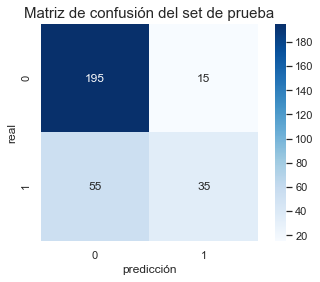

In [77]:
matrix2 = confusion_matrix(y_test, y_test_pred2)
sns.heatmap(matrix2, annot=True, fmt="d", cmap='Blues', square=True)
plt.title('Matriz de confusión del set de prueba', fontsize = 15)
plt.xlabel("predicción")
plt.ylabel("real")
plt.show()

De los 90 casos de clase minotiratia, que es la de los clientes clasificados como 'malos' para entregarles un crédito bancario, el modelo pudo clasificar bien sólo a 35, es decir un 40% aproximadamente.  

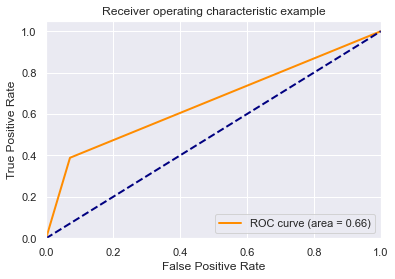

In [78]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_test_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

En este caso, usando un modelo de Random Forest, el área bajo la curva aumentó un poco con respecto al modelo de un único árbol de decisión, subió a 0,66, pero sigue siendo un valor bajo. 

### Pruebo con un algoritmo de ensamble, pero en este caso de tipo boosting 

Se entrena una secuencia de modelos donde se da más peso a los ejemplos que fueron clasificados erróneamente por iteraciones anteriores.
Al igual que con el modelo anterior de Forest Random, la tarea de clasificación se resuelve con una mayoría ponderada de votos, pero en este caso la diferencia es que los arboles no corren en paralelo, sino que los nuevos modelos van a tener en cuenta la clasificación del anterior, y pondrán más peso o importancia en clasificar aquellas instancias que el anterior clasificó mal.

In [83]:
from sklearn.ensemble import AdaBoostClassifier

params = {'base_estimator':[DecisionTreeClassifier(max_depth = 2), DecisionTreeClassifier(max_depth = 3), DecisionTreeClassifier(max_depth = 4),
                            DecisionTreeClassifier(max_depth = 5), DecisionTreeClassifier(max_depth = 6), DecisionTreeClassifier(max_depth = 7),
                            DecisionTreeClassifier(max_depth = 8), DecisionTreeClassifier(max_depth = 9), DecisionTreeClassifier(max_depth = 10),
                            DecisionTreeClassifier(max_depth = 11), DecisionTreeClassifier(max_depth = 12), DecisionTreeClassifier(max_depth = 13), 
                            DecisionTreeClassifier(max_depth = 14), DecisionTreeClassifier(max_depth = 15)]}

model_adaboost = RandomizedSearchCV(AdaBoostClassifier(random_state=42), param_distributions =params, cv=3, scoring = 'recall')
model_adaboost = model_adaboost.fit(X_train, y_train)

print('Best Score: %.3f'%model_adaboost.best_score_)
print('Recall Score: ',model_adaboost.best_params_)

y_train_pred3 = model_adaboost.predict(X_train)
y_test_pred3 = model_adaboost.predict(X_test)

Best Score: 0.462
Recall Score:  {'base_estimator': DecisionTreeClassifier(max_depth=6)}


In [84]:
report3 = classification_report(y_test, y_test_pred3)
print(report3)

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       210
           1       0.60      0.44      0.51        90

    accuracy                           0.74       300
   macro avg       0.69      0.66      0.67       300
weighted avg       0.73      0.74      0.73       300



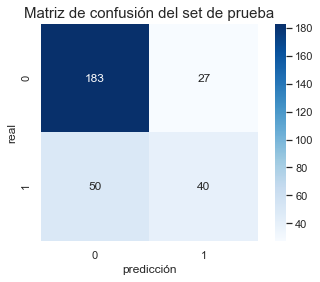

In [86]:
matrix3 = confusion_matrix(y_test, y_test_pred3)
sns.heatmap(matrix3, annot=True, fmt="d", cmap='Blues', square=True)
plt.title('Matriz de confusión del set de prueba', fontsize = 15)
plt.xlabel("predicción")
plt.ylabel("real")
plt.show()

Vemos tanto en el reporte como la matriz de confusión, que subió un poco el recall pero la precisión bajo. 
Igualmente se sigue equivocando en la clasificación de la clase que nos interesa más de lo que predice bien, en este caso pudo clasificar correctamente a 40 de 90 instancias, es decir un 44% (recall) 

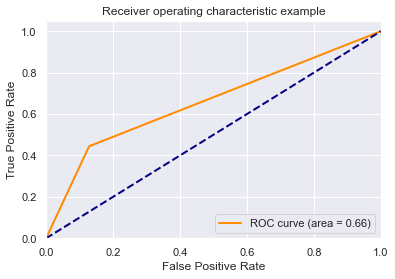

In [87]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_test_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Vemos que el area bajo la curva da igual que en el caso de Random Forest: 0,66

#### Pruebo haciendo un sobremuestreo de la clase minoritaria para tener las dos clases mas balanceadas, ya que al tener 30% de clase minoritaria el modelo no tiene datos suficientes para predecir del todo bien.

1    700
0    700
Name: default, dtype: int64


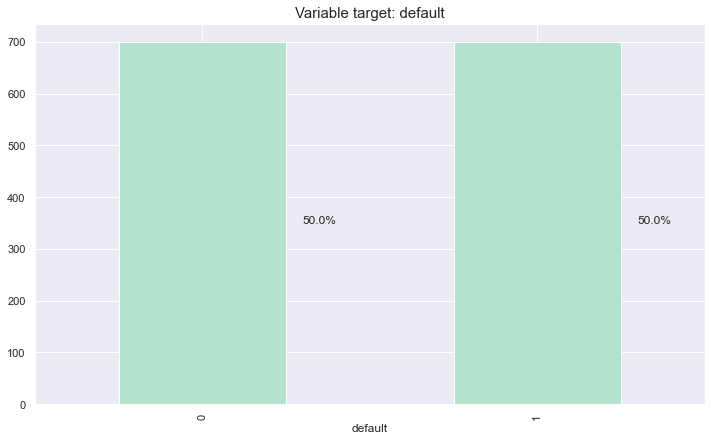

In [88]:
from sklearn.utils import resample

# Separo las clases: mayoritaria (0) y minoritaria (1)
data_mayoritaria = data[data.default == 0]
data_minoritaria = data[data.default == 1]
 
# Upsample minority class
data_minoritaria_resample = resample(data_minoritaria, 
                                 replace=True,     
                                 n_samples=700,    #para que tenga la misma cantidad de datos que la clase mayoritaria
                                 random_state=123) 
 
# Combino las dos clases
data_resample = pd.concat([data_mayoritaria, data_minoritaria_resample])
 
# Display new class counts
print(data_resample.default.value_counts())

ax = data_resample.groupby(['default']).size().plot(kind = 'bar', stacked=True, figsize = (12,7), cmap = 'Pastel2')
total = len(data_resample)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() + 0.05
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y))
    
plt.title('Variable target: default', fontsize = 15)
plt.show()

### Vuelvo a aplicar el modelo de arbol de decisión

In [89]:
y_resample = data_resample['default']
X_resample = data_resample.drop(['default', 'telephone', 'foreign_worker', 'residence_history'], axis = 1)


print(y_resample.shape, X_resample.shape)

(1400,) (1400, 49)


In [90]:
from sklearn.model_selection import train_test_split
X_train_resample, X_test_resample, y_train_resample, y_test_resample = train_test_split(X_resample, y_resample, test_size=0.30, random_state = 42, stratify = y_resample)

In [91]:
#Escalo los datos
scl = StandardScaler()
X_train_resample = scl.fit_transform(X_train_resample)
X_test_resample = scl.transform(X_test_resample)

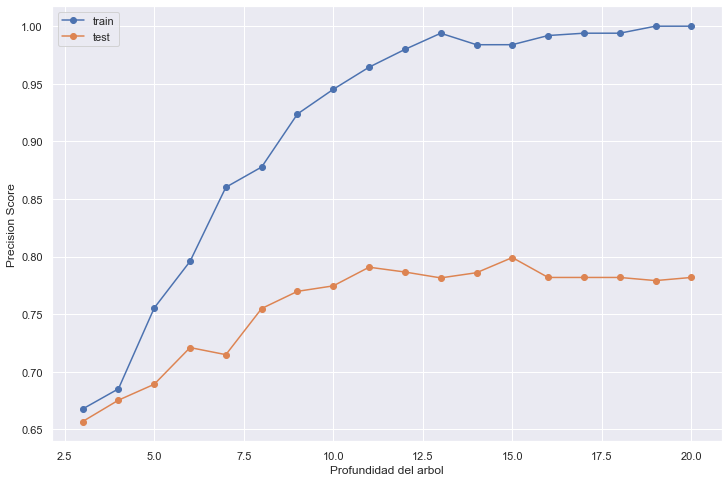

In [92]:
max_depths = np.arange(3,21)

lista_error_train, lista_error_test  = modelo_arboles(max_depths, X_train_resample, y_train_resample, X_test_resample, y_test_resample)

#Grafico
plt.figure(figsize = (12,8))
plt.plot(max_depths,lista_error_train,'o-',label='train' )
plt.plot(max_depths,lista_error_test,'o-',label='test')
plt.legend()
plt.xlabel('Profundidad del arbol')
plt.ylabel('Precision Score')
plt.show()

In [93]:
#Creo un modelo de arbol de decision con max_depth = 15 que es el que mayor precisión me dio 
clf2 = DecisionTreeClassifier(random_state = 0, max_depth=15)
clf2.fit(X_train_resample, y_train_resample)
y_test_pred_resample = clf2.predict(X_test_resample)
score_train = cross_val_score(clf2, X_train_resample, y_train_resample, scoring = 'precision', cv = 5)
score_test = cross_val_score(clf2, X_test_resample, y_test_resample, scoring = 'precision', cv = 5)
print('Precision score Train: ',score_train.mean())
print('Precision score Test: ',score_test.mean())


Precision score Train:  0.7483155639304842
Precision score Test:  0.7050598426664945


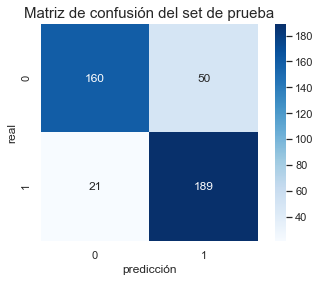

In [94]:
matrix_resample = confusion_matrix(y_test_resample, y_test_pred_resample)
sns.heatmap(matrix_resample, annot=True, fmt="d", cmap='Blues', square=True)
plt.title('Matriz de confusión del set de prueba', fontsize = 15)
plt.xlabel("predicción")
plt.ylabel("real")
plt.show()

Vemos que con el sobremuestreo de la clase minoritaria, al tener las dos clases balanceadas, el modelo predijo mucho mejor, de los 210 casos de la clase 1, el modelo predijo bien 189 de ellos, que corresponden al 90%.

In [95]:
report_resample = classification_report(y_test_resample, y_test_pred_resample)
print(report_resample)

              precision    recall  f1-score   support

           0       0.88      0.76      0.82       210
           1       0.79      0.90      0.84       210

    accuracy                           0.83       420
   macro avg       0.84      0.83      0.83       420
weighted avg       0.84      0.83      0.83       420



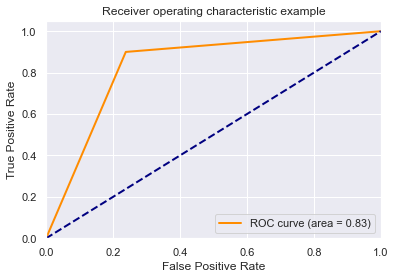

In [96]:
fpr, tpr, thresholds = roc_curve(y_test_resample, y_test_pred_resample)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Vemos que el area bajo la curva ROC, que representa la habilidad del modelo para discriminar entre la clase negativa y la positiva, subió a 0,83

In [98]:
importancia_resample = clf2.feature_importances_
label = X_resample.columns.values
feat_import = {'Atributos': label, 'Importancia': importancia_resample}
dataset = pd.DataFrame(data = feat_import)
dataset.sort_values(by = 'Importancia', ascending = False)

,Atributos,Importancia
1,amount,0.163467
3,age,0.159132
9,checking_balance_unknown,0.126802
0,months_loan_duration,0.099838
41,installment_plan_none,0.038459
2,installment_rate,0.030990
39,property_real estate,0.030295
20,purpose_business,0.024428
16,savings_balance_< 100 DM,0.023606
27,employment_length_1 - 4 yrs,0.019872


Vemos que en cuanto a la importancia de las caracteristicas, las 4 primeras siguen siendo iguales, con porcentajes muy similares a los anteriores. 

#### Pruebo con el ensamble tipo bagging: Random Forest

In [99]:
rand_forest_resample = RandomForestClassifier(random_state=42)

#Random Search para realizar cross validation y para buscar el mejor hiperparametro max_depth
model_resample = RandomizedSearchCV(rand_forest_resample,param_distributions={'max_depth': np.arange(2, 16)}, cv=5, refit=True, scoring = 'recall')

model_resample.fit(X_train_resample, y_train_resample)

print("Mejores parametros: "+str(model_resample.best_params_))
print("Recall: "+str(model_resample.best_score_)+'\n')

#Hago las predicciones con el modelo 
y_train_pred2_resample = model_resample.predict(X_train_resample)
y_test_pred2_resample = model_resample.predict(X_test_resample)

Mejores parametros: {'max_depth': 13}
Recall: 0.8591836734693878



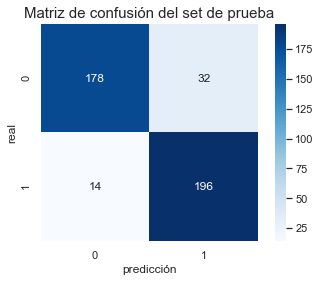

In [100]:
matrix2_resample = confusion_matrix(y_test_resample, y_test_pred2_resample)
sns.heatmap(matrix2_resample, annot=True, fmt="d", cmap='Blues', square=True)
plt.title('Matriz de confusión del set de prueba', fontsize = 15)
plt.xlabel("predicción")
plt.ylabel("real")
plt.show()

In [101]:
report2_resample = classification_report(y_test_resample, y_test_pred2_resample)
print(report2_resample)

              precision    recall  f1-score   support

           0       0.93      0.85      0.89       210
           1       0.86      0.93      0.89       210

    accuracy                           0.89       420
   macro avg       0.89      0.89      0.89       420
weighted avg       0.89      0.89      0.89       420



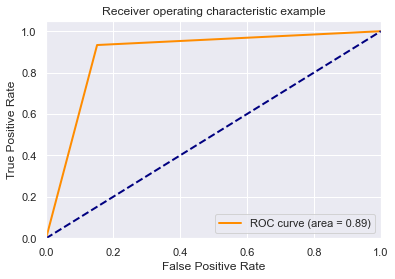

In [102]:
fpr, tpr, thresholds = roc_curve(y_test_resample, y_test_pred2_resample)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Realizando un modelo de ensamble con las clases balanceadas, vemos una gran mejoría en las métricas obtenidas.

#### Pruebo con un algoritmo de ensamble tipo boosting

In [104]:
params = {'base_estimator':[DecisionTreeClassifier(max_depth = 2), DecisionTreeClassifier(max_depth = 3), DecisionTreeClassifier(max_depth = 4),
                            DecisionTreeClassifier(max_depth = 5), DecisionTreeClassifier(max_depth = 6), DecisionTreeClassifier(max_depth = 7),
                            DecisionTreeClassifier(max_depth = 8), DecisionTreeClassifier(max_depth = 9), DecisionTreeClassifier(max_depth = 10),
                            DecisionTreeClassifier(max_depth = 11), DecisionTreeClassifier(max_depth = 12), DecisionTreeClassifier(max_depth = 13), 
                            DecisionTreeClassifier(max_depth = 14), DecisionTreeClassifier(max_depth = 15)]}

model2_adaboost = RandomizedSearchCV(AdaBoostClassifier(random_state=42), param_distributions =params, cv=3, scoring = 'recall')
model2_adaboost = model_adaboost.fit(X_train_resample, y_train_resample)

print('Best Score: %.3f'%model2_adaboost.best_score_)
print('Recall Score: ',model2_adaboost.best_params_)

y_train_pred3_resample = model2_adaboost.predict(X_train_resample)
y_test_pred3_resample = model2_adaboost.predict(X_test_resample)

Best Score: 0.849
Recall Score:  {'base_estimator': DecisionTreeClassifier(max_depth=3)}


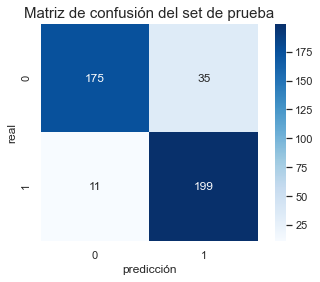

In [105]:
matrix3_resample = confusion_matrix(y_test_resample, y_test_pred3_resample)
sns.heatmap(matrix3_resample, annot=True, fmt="d", cmap='Blues', square=True)
plt.title('Matriz de confusión del set de prueba', fontsize = 15)
plt.xlabel("predicción")
plt.ylabel("real")
plt.show()

La predicción de la clase que nos interesa mejoró y subió a un 95% en cuanto a la calidad del modelo para predecir la clase positiva.

In [106]:
report3_resample = classification_report(y_test_resample, y_test_pred3_resample)
print(report3_resample)

              precision    recall  f1-score   support

           0       0.94      0.83      0.88       210
           1       0.85      0.95      0.90       210

    accuracy                           0.89       420
   macro avg       0.90      0.89      0.89       420
weighted avg       0.90      0.89      0.89       420



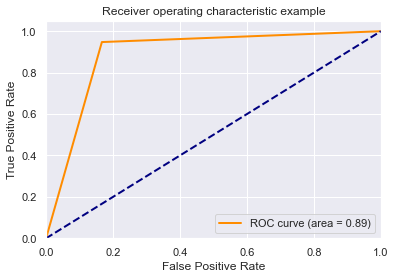

In [107]:
fpr, tpr, thresholds = roc_curve(y_test_resample, y_test_pred3_resample)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

En cuanto a los modelos realizados, el que mejor resultados devolvió fue el de Boosting con la clase balanceada. 
En ese modelo 210 casos de clientes con impagos, el modelo fue capaz de predecir bien 199 de ellos, es decir un 95%.